<h2>Project 2: The Perceptron</h2>


<!--announcements-->
<blockquote>
    <center>
    <img src="perceptron.png" width="200px" />
    </center>
      <p><cite><center>"What, we asked, wasn't the Perceptron capable of?"<br>
      Rival, The New Yorker, December 6, 1958 P. 44</center>
      </cite></p>
</blockquote>

<h3>Introduction</h3>
<!--Aðalbrandr-->

<p>In this project, you will implement a simple Perceptron classifier to classify digits (or anything else).</p>

<strong>How to submit:</strong> You can submit your code using the red <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Dishonesty:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://piazza.com/class/icxgflcnpra3ko">Piazza</a> are there for your support; please use them.  If you can't make our office hours, let us know and we will schedule more.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  

<h3> The Perceptron </h3>

<p>The perceptron is a basic linear classifier. The following questions will ask you to finish these functions in a pre-defined order. Unless specified otherwise, do not use loops.<br></p>

<p>(a) Implement the process of updating the weight vector in the following function. (Hint: In Julia, if you compute <code>p=v*w'</code> for row vectors <code>v,w</code>, the output <code>p</code> will be an array. You can call <code>p=p[1]</code> to cast it as a scalar.)  
</p>



In [6]:
#<GRADED>
import numpy as np
from numpy.matlib import repmat
#</GRADED>
import sys
import matplotlib 
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

# add p02 folder
sys.path.insert(0, './p02/')

%matplotlib inline

In [7]:
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.5.2


In [8]:
def loaddata(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["xTr"]; # load in Training data
    yTr = np.round(data["yTr"]); # load in Training labels
    xTe = data["xTe"]; # load in Testing data
    yTe = np.round(data["yTe"]); # load in Testing labels
    return xTr.T,yTr.T,xTe.T,yTe.T

In [9]:
#<GRADED>
def row_vectorize(x):
    return x.reshape(1,-1)
#</GRADED>

In [146]:
#<GRADED>
def perceptronUpdate(x,y,w):
    """
    function w=perceptronUpdate(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
    x : input vector of d dimensions (1xd)
    y : corresponding label (-1 or +1)
    w : weight vector before updating
    
    Output:
    w : weight vector after updating
    """
    # just in case x, w are accidentally transposed (prevents future bugs)
    #x,w = map(row_vectorize, [x,w])
    
    assert(y in [1,-1])
    ## fill in code here
    w = w + y*x
    return w
#</GRADED>

In [72]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[2,3,4],[5,6,7]])
c = np.array([[1,1,1],[-1,-1,-1]])
print(a)
print(b)
print(c)

[[1 2 3]
 [4 5 6]]
[[2 3 4]
 [5 6 7]]
[[ 1  1  1]
 [-1 -1 -1]]


In [73]:
a=a.reshape(1,-1)
b=b.reshape(1,-1)
c=c.reshape(1,-1)
print(a)

[[1 2 3 4 5 6]]


In [74]:
a*b+c

array([[ 3,  7, 13, 19, 29, 41]])

<p>(b) Implement function <b><code>perceptron</code></b>. This should contain a loop that calls 
<b><code>perceptronUpdate</code></b>
 until it converges or the maximum iteration count, 100, has been reached.
 Make sure you randomize the order of the training data on each iteration. </p>

In [108]:
#<GRADED>
def perceptron(x,y):
    """
    function w=perceptron(x,y);
    
    Implementation of a Perceptron classifier
    Input:
    x : n input vectors of d dimensions (nxd)
    y : n labels (-1 or +1)
    
    Output:
    w : weight vector (1xd)
    """
    
    n, d = x.shape
    w = np.zeros((1,d))
    
    ## fill in code here
    niter = 0
    while True:
        m = 0
        niter = niter + 1
        index = np.random.permutation(range(n)) # randomness affects the order of w getting updated.
        for i in index:
            if (y[i] * np.matmul(x, w.T)[i]) <= 0:
                w = perceptronUpdate(x[i],y[i],w)
                m = m + 1
        if m == 0 or niter == 100:
            break
    return w
#</GRADED>

In [95]:
x = np.array([[1,2],[3,4],[5,6],[7,8]])
# n, d = x.shape
# w = np.zeros((1,d))
w = np.array([[5,100]])
print(x)
print(w)
np.matmul(x,w.T)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[  5 100]]


array([[205],
       [415],
       [625],
       [835]])

<p>(c) 
	Implement 
<b><code>classifyLinear</code></b>
 that applies the weight vector and bias to the input vector. (The bias is an optional parameter. If it is not passed in, assume it is zero.) Make sure that the predictions returned are either 1 or -1.</p> 



In [147]:
#<GRADED>

def classifyLinear(x,w,b=0):
    """
    function preds=classifyLinear(x,w,b)
    
    Make predictions with a linear classifier
    Input:
    x : n input vectors of d dimensions (nxd)
    w : weight vector (1xd)
    b : bias (scalar)
    
    Output:
    preds: predictions (nx1) 
    """
    # w = w.reshape(-1)
    ## fill in code here
#    x = x.reshape(1,256)
    print("input x dim:", x.shape)
    preds = np.zeros((x.shape[0], 1))  ## dimension should be nx1 instead of 1xn
    for j in range(x.shape[0]):
        if np.matmul(x[j], w.T) + b > 0:
            preds[j] = 1
        else:
            preds[j] = -1
    return preds.reshape(1, x.shape[0])
#</GRADED>

In [78]:
z = np.zeros((10,1))
z.shape
print(z[0])
print(z)

[0.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]



<p> You can use the following script to visualize your perceptron on linearly separable data in 2 dimensions. Your classifier should find a separating hyperplane on such data.   </p>

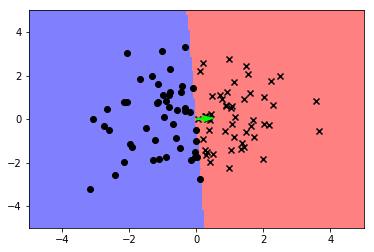

In [148]:
# number of input vectors
N = 100
# Define the symbols and colors we'll use in the plots later
symbols = ['ko', 'kx']
mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
classvals = [-1, 1]

# generate random (linarly separable) data
trainPoints = np.random.randn(N, 2) * 1.5

# defining random hyperplane
w = np.random.rand(2)

# assigning labels +1, -1 labels depending on what side of the plane they lie on
trainLabels = np.sign(np.dot(trainPoints, w))
i = np.random.permutation([i for i in range(N)])

# shuffling training points in random order
trainPoints = trainPoints[i, :]
trainLabels = trainLabels[i]

# call perceptron to find w from data
w = perceptron(trainPoints.copy(),trainLabels.copy())
b = 0

res=300
xrange = np.linspace(-5, 5,res)
yrange = np.linspace(-5, 5,res)
pixelX = repmat(xrange, res, 1)
pixelY = repmat(yrange, res, 1).T

testPoints = np.array([pixelX.flatten(), pixelY.flatten(), np.ones(pixelX.flatten().shape)]).T
testLabels = np.dot(testPoints, np.concatenate([w.flatten(), [b]]))

Z = testLabels.reshape(res,res)
plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
plt.scatter(trainPoints[trainLabels == classvals[0],0],
            trainPoints[trainLabels == classvals[0],1],
            marker='o',
            color='k'
           )
plt.scatter(trainPoints[trainLabels == classvals[1],0],
            trainPoints[trainLabels == classvals[1],1],
            marker='x',
            color='k'
           )
plt.quiver(0,0,w[0,0],w[0,1],linewidth=0.5, color=[0,1,0])
plt.axis('tight')
plt.show()

<h3>Hints</h3>
<tr><td><code>randperm </code></td><td>Returns a vector with the numbers [1,n] in a random permutation.</td></tr>

<h4>Credits</h4>
  Parts of this webpage were copied from or heavily inspired by John DeNero's and Dan Klein's (awesome) <a href="http://ai.berkeley.edu/project_overview.html">Pacman class</a>.

In [149]:
def binarize(x, val):
    z = np.zeros(x.shape)
    z[x != val] = 0
    z[x == val] = 1
    return z


<p> You can use the following script to visualize the weight vector and classification error on the digits data set. Your perceptron should be able to find a separating hyperplane for this data. </p>

input x dim: (100, 256)
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
input x dim: (100, 256)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

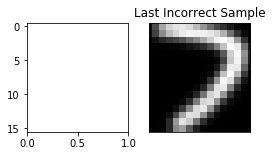

In [150]:
from IPython import display
import pylab as pl

xTr,yTr,xTe,yTe=loaddata("digits.mat")
MAXITER = 10
N = 100
c = [0, 7]

ii = np.where(np.logical_or(yTr == c[0], yTr == c[1]).flatten())[0]
ii = ii[np.random.permutation([i for i in range(len(ii))])]
ii = ii[:N]

xTr = xTr[ii,:]
yTr = yTr[ii].flatten()
yTr = binarize(yTr, c[0]) * 2 - 1

n = 2    
size = 2
f, axarr = plt.subplots(1, n, sharey=True)
f.set_figwidth(size * n)
f.set_figheight(size /2 *n)

w = np.zeros(xTr[0,:].shape)
err = 1.0

plt.ion()

# run at most MAXITER iterations
for itr in range(MAXITER):
    for i in range(N):
        # draw offender
        axarr[1].imshow(xTr[i,:].reshape(16,16).T, cmap=plt.cm.binary_r)
        axarr[1].tick_params(axis='both', which='both', bottom='off', top='off',
                             labelbottom='off', right='off', left='off', labelleft='off')
        axarr[1].set_title('Last Incorrect Sample')
        
#        print(classifyLinear(xTr[i,:], w))
#        print(yTr[i])
#        print(xTr.shape)
#        if classifyLinear(xTr[i,:], w) != yTr[i]:
        print(classifyLinear(xTr, w)[i])
        if classifyLinear(xTr, w)[i] != yTr[i]:
            # do update
            w = perceptronUpdate(xTr[i,:], yTr[i], w)
            # compute new training error
            preds = classifyLinear(xTr, w)
            err = np.sum(yTr == preds) / float(len(yTr))

            # plot new vector
            axarr[0].imshow(w.reshape(16,16).T, cmap=plt.cm.binary_r)
            axarr[0].tick_params(axis='both', which='both', bottom='off', top='off',
                                 labelbottom='off', right='off', left='off', labelleft='off')
            axarr[0].set_title('Weight Vector')
            axarr[0].set_xlabel('Acurracy: %.2f' % err)
            
            display.display(pl.gcf())
            display.clear_output(wait=True)
        if err == 0.:
            break
    time.sleep(0.01)
    
    if err == 0.:
        break

axarr[1].set_xlabel('Done!')
display.display(pl.gcf())
display.clear_output(wait=True)